# Exercise 2 - Multi-class text classification Problem

GOAL: Use Supervised Machine Learning Methods and NLP to build a model that classifies new incoming "user complains" into one of the product categories.
      Target variable: Product
      Feature: "Consumer complaint narrative"

EXERCISE: 
    - Preprocess the dataset 
        NB: please notice that the TfidVectorized will not run locally on the whole dataset. The exercise will be presented on a non-random subsample of 5000 rows
        NBB: Select a RANDOM subsample of your choice 
    - Use TF-IDF for Text Representation
    - Using the Naive Bayes implementation as a guidance, apply other classification models to the problem.
    - Evaluate all the models used and identify the best one (Models benchmarking and comparison examples are included in the code)
    

# Walkthrough

#### Data Exploration
     - cutting dataset
#### Data Cleaning
     - checking for class imbalances
#### Text Representation
    - TF-IDF
    - Finding terms correlations
#### Classifier Implementation (Naive Bayes)
#### Multiple Model Implementation 
#### Benchmarking and Evaluation

### DATA EXPLORATION

In [19]:
import pandas as pd
df = pd.read_csv('/home/clemente/hub/PA/Data_Science/Working_Materials/NLP_2/Consumer_Complaints.csv')
df.head()

/home/clemente/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,12/31/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"Convergent Resources, Inc.",GA,NaN,NaN,NaN,Web,12/31/2018,Closed with explanation,Yes,NaN,3113161
1,12/31/2018,Vehicle loan or lease,Lease,Managing the loan or lease,Problem with fees charged,NaN,NaN,MERCEDES BENZ FINANCIAL SERVICES,CA,NaN,NaN,Other,Web,12/31/2018,In progress,Yes,NaN,3113131
2,12/31/2018,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"BCA Financial Services, Inc.",FL,336XX,NaN,NaN,Web,12/31/2018,In progress,Yes,NaN,3113586
3,12/31/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"Commonwealth Financial Systems, Inc.",GA,NaN,NaN,NaN,Web,12/31/2018,Closed with explanation,Yes,NaN,3113440
4,12/31/2018,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,NaN,AES/PHEAA,OR,NaN,NaN,NaN,Web,12/31/2018,Closed with explanation,Yes,NaN,3113157


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189771 entries, 0 to 1189770
Data columns (total 18 columns):
Date received                   1189771 non-null object
Product                         1189771 non-null object
Sub-product                     954605 non-null object
Issue                           1189771 non-null object
Sub-issue                       670648 non-null object
Consumer complaint narrative    354576 non-null object
Company public response         402196 non-null object
Company                         1189771 non-null object
State                           1173147 non-null object
ZIP code                        1091506 non-null object
Tags                            162567 non-null object
Consumer consent provided?      627943 non-null object
Submitted via                   1189771 non-null object
Date sent to company            1189771 non-null object
Company response to consumer    1189765 non-null object
Timely response?                1189771 non-null obje

In [21]:
#Running the exercise on the first 5000 rows
df = df.head(5000)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Date received                   5000 non-null object
Product                         5000 non-null object
Sub-product                     5000 non-null object
Issue                           5000 non-null object
Sub-issue                       4335 non-null object
Consumer complaint narrative    525 non-null object
Company public response         1887 non-null object
Company                         5000 non-null object
State                           4827 non-null object
ZIP code                        4243 non-null object
Tags                            640 non-null object
Consumer consent provided?      1369 non-null object
Submitted via                   5000 non-null object
Date sent to company            5000 non-null object
Company response to consumer    5000 non-null object
Timely response?                5000 non-null object
Consumer disputed?              0 non-null obje

### DATA CLEANING

In [ ]:
#TO DO: Identify the target and the feature columns

In [1]:
#TO DO: Clean the columns (removing missing values)


#### Checking for class imbalances
- TO DO: visualize the category frequency in the dataset 
NB: NO RESAMPLING METHOD IS IMPLEMENTED

#### Text Representation

Raw text cannot be used for classification purposes. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives

In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer
#TO DO: Implement the TfidVectorizer



(525, 1582)

In [27]:
features.shape
# Now, each of 525 consumer complaint narratives is represented by 1582 features, representing the tf-idf score for different unigrams and bigrams.

(525, 1582)

#### Finding terms correlation with Chi2 test

In [26]:
#using sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Checking or savings account':
  . Most correlated unigrams:
. deposited
. bonus
  . Most correlated bigrams:
. 15000 00
. checking account
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. store
. card
  . Most correlated bigrams:
. month xxxx
. credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. debt
. transunion
  . Most correlated bigrams:
. identity theft
. victim identity
# 'Debt collection':
  . Most correlated unigrams:
. collection
. debt
  . Most correlated bigrams:
. collection agency
. debt collector
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
. transferred
. transfer
  . Most correlated bigrams:
. 18 xxxx
. wells fargo
# 'Mortgage':
  . Most correlated unigrams:
. modification
. mortgage
  . Most correlated bigrams:
. freedom mortgage
. loan modification
# 'Payday loan, title loan, or personal loan':
  . Most correlated unigrams:
. 1500
. loa

####   Classifier Implementation ( Naive Bayes)
#TO DO: implement a naive bayes classifier to predict df['product] from df['Consumer_complaint_narrative] - see the example for the implementation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit('your parameters here')

In [29]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [32]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


#### Multiple Model implementation

TO DO: implement and evaluate the perfomances of others classifiers. ( You're free to chose and compare. The exercise will feature Random Forest, Logistic Regression, Multinominal Naive Bayes and LSVM


/home/clemente/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/clemente/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/clemente/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/clemente/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 

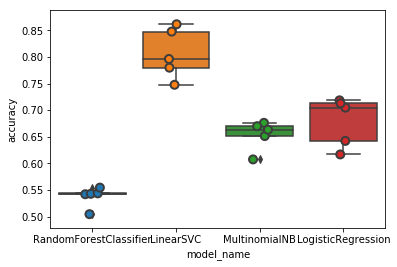

In [34]:
# HINT: Use boxplots and stripplot below to compare the models







import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

model_name
LinearSVC                 0.806520
LogisticRegression        0.679021
MultinomialNB             0.653663
RandomForestClassifier    0.537529
Name: accuracy, dtype: float64

#### Model Evaluation Example

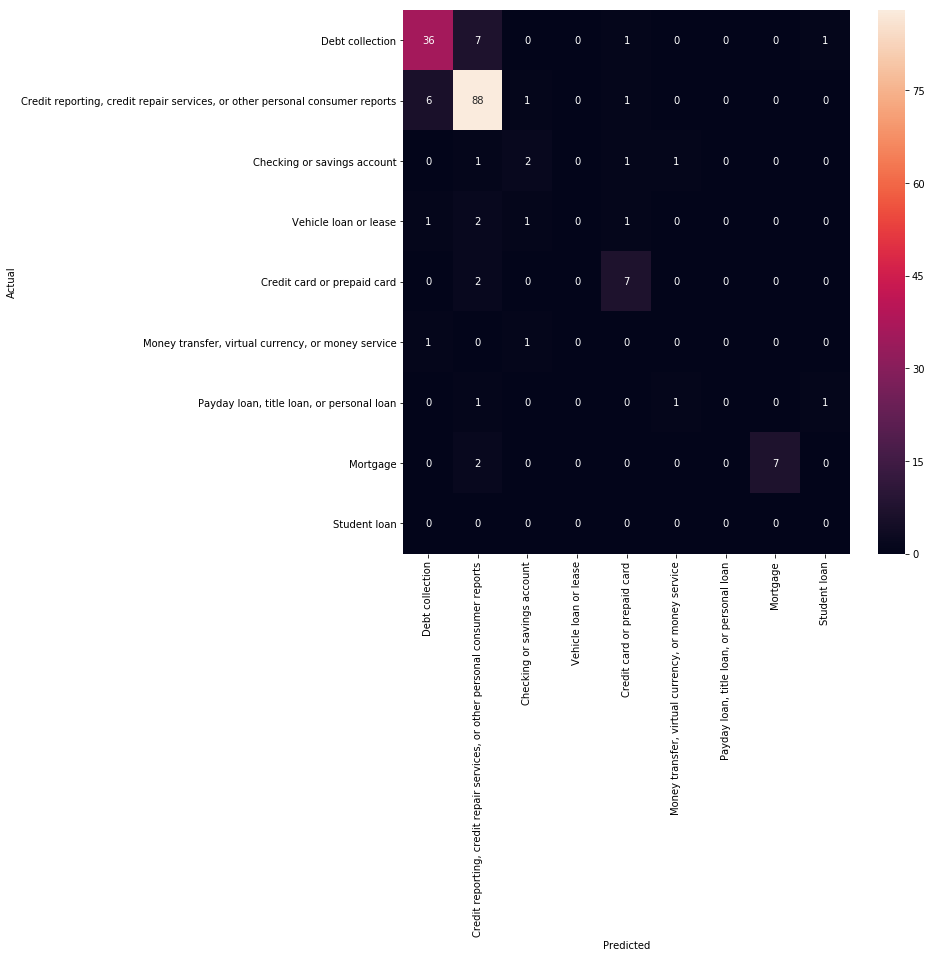

In [37]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Chi-squared test Correlation for model example

In [39]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


# 'Checking or savings account':
  . Top unigrams:
       . checking
       . transactions
  . Top bigrams:
       . checking account
       . 400 00
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . store
  . Top bigrams:
       . 30 day
       . xxxx card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . transunion
       . experian
  . Top bigrams:
       . credit report
       . xxxx received
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . services xxxx
       . trying collect
# 'Money transfer, virtual currency, or money service':
  . Top unigrams:
       . transfer
       . money
  . Top bigrams:
       . 18 xxxx
       . days later
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . escrow
  . Top bigrams:
       . loan modification
       . freedom mortgage
# 'Payday loan, title loan, or personal loan':
  . Top unigrams:
       . loan
    

In [41]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                             Debt collection       0.82      0.80      0.81        45
Credit reporting, credit repair services, or other personal consumer reports       0.85      0.92      0.88        96
                                                 Checking or savings account       0.40      0.40      0.40         5
                                                       Vehicle loan or lease       0.00      0.00      0.00         5
                                                 Credit card or prepaid card       0.64      0.78      0.70         9
                          Money transfer, virtual currency, or money service       0.00      0.00      0.00         2
                                   Payday loan, title loan, or personal loan       0.00      0.00      0.00         3
                                                       

/home/clemente/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/clemente/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
